In [11]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn 
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7], [11], [15] ]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
device =  'cpu'
print(device)
X = X.to(device)
Y = Y.to(device)

cpu


In [13]:
class DS(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __len__ (self):
        return len(self.x)
    def __getitem__(self,ix):
        return self.x[ix], self.y[ix]


In [14]:
ds = DS(x, y)

In [15]:
d1 = DataLoader(ds, batch_size=2, shuffle=True)

In [8]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,8)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(8,1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x
        

In [27]:
loss_func = nn.MSELoss()
model = NN()
opt = SGD(model.parameters(), lr=0.0001)

In [30]:
losses = []

for _ in range(50):
    for data in d1:
        opt.zero_grad()
        x1, y1 = data
        loss_value = loss_func(model(x1), y1)
        loss_value.backward()
        opt.step()
        losses.append(loss_value.detach().numpy())


Text(0, 0.5, 'loss value')

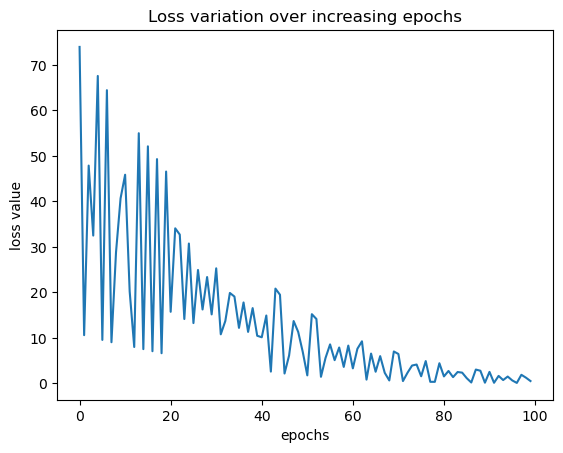

In [31]:
plt.plot(losses)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')